In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

asbestos = pd.read_csv("Asbestos.csv")

In [2]:
query_mask = asbestos['city'] == 'PITTSBURGH'
asbestos_in_pitt = asbestos[query_mask]

<AxesSubplot:>

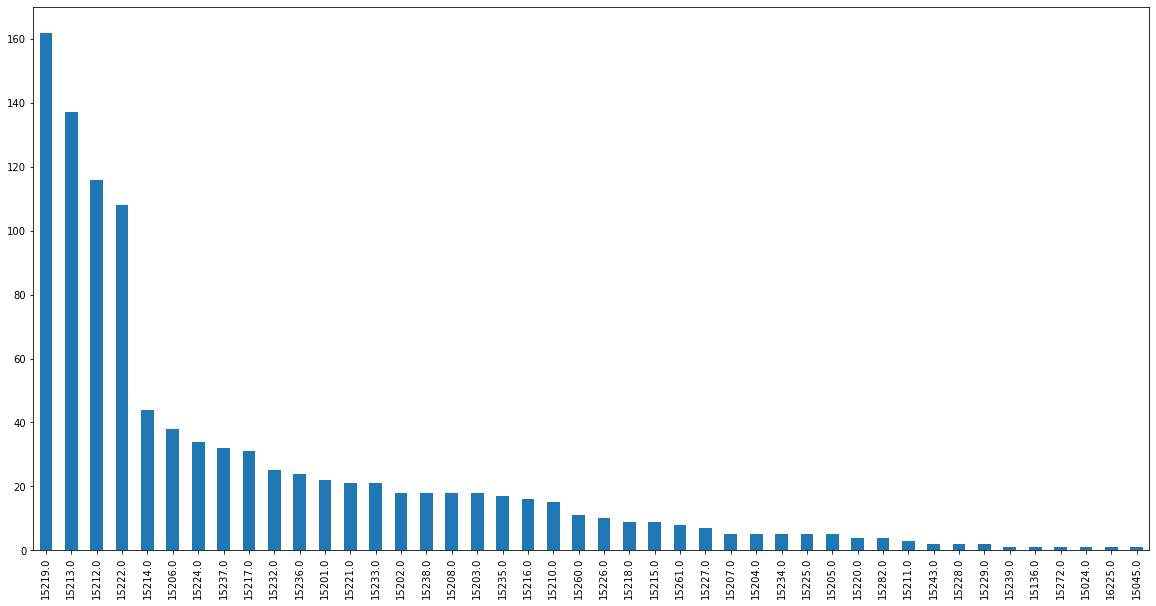

In [3]:
zip_and_asbestos = pd.DataFrame({'zip_code':asbestos_in_pitt['z_code'],'asbestos_free':asbestos_in_pitt['job_complete']})
query_mask2 = zip_and_asbestos['asbestos_free'] == 'f'
contains_asbestos = zip_and_asbestos[query_mask2]
contains_asbestos['zip_code'].value_counts().plot.bar(figsize=(20,10))

In [4]:
contains_asbestos['zip_code'].value_counts()

15219.0    162
15213.0    137
15212.0    116
15222.0    108
15214.0     44
15206.0     38
15224.0     34
15237.0     32
15217.0     31
15232.0     25
15236.0     24
15201.0     22
15221.0     21
15233.0     21
15202.0     18
15238.0     18
15208.0     18
15203.0     18
15235.0     17
15216.0     16
15210.0     15
15260.0     11
15226.0     10
15218.0      9
15215.0      9
15261.0      8
15227.0      7
15207.0      5
15204.0      5
15234.0      5
15225.0      5
15205.0      5
15220.0      4
15282.0      4
15211.0      3
15243.0      2
15228.0      2
15229.0      2
15239.0      1
15136.0      1
15272.0      1
15024.0      1
16225.0      1
15045.0      1
Name: zip_code, dtype: int64

In [5]:
with_neighborhood = pd.read_csv("data_with_neighborhoods/Asbestos_WithNeighborhood.csv")
query_mask3 = with_neighborhood["job_complete"] == "f"
neighborhood_contains_asbestos = with_neighborhood[query_mask3]

<AxesSubplot:>

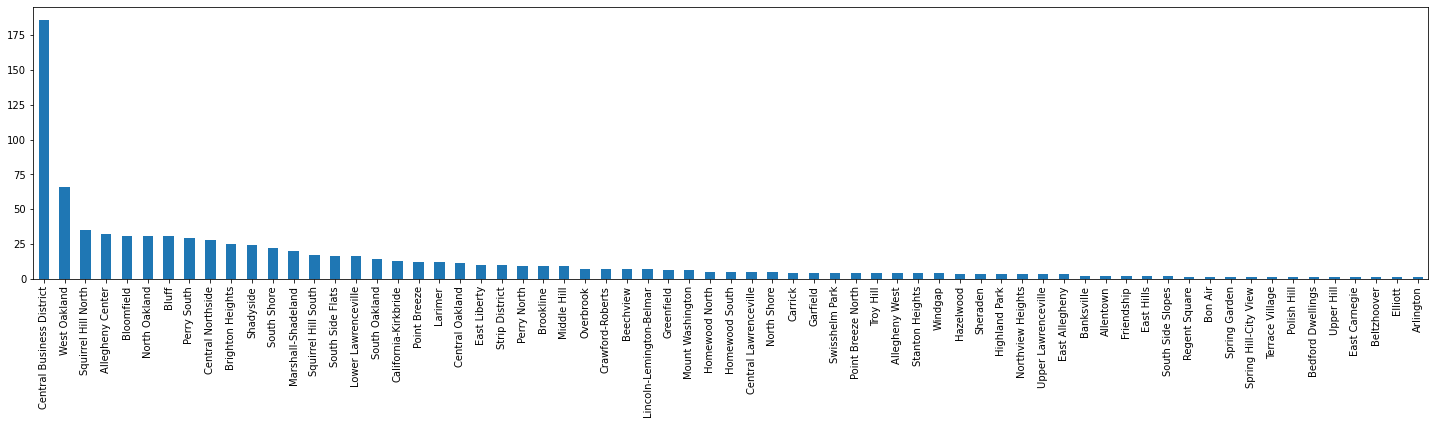

In [6]:
neighborhood_contains_asbestos["neighborhood"].value_counts().plot.bar(figsize = (25,5))

In [7]:
pd.options.display.max_rows = 100
neighborhood_contains_asbestos["neighborhood"].value_counts()

Central Business District    186
West Oakland                  66
Squirrel Hill North           35
Allegheny Center              32
Bloomfield                    31
North Oakland                 31
Bluff                         31
Perry South                   29
Central Northside             28
Brighton Heights              25
Shadyside                     24
South Shore                   22
Marshall-Shadeland            20
Squirrel Hill South           17
South Side Flats              16
Lower Lawrenceville           16
South Oakland                 14
California-Kirkbride          13
Point Breeze                  12
Larimer                       12
Central Oakland               11
East Liberty                  10
Strip District                10
Perry North                    9
Brookline                      9
Middle Hill                    9
Overbrook                      7
Crawford-Roberts               7
Beechview                      7
Lincoln-Lemington-Belmar       7
Greenfield

In [8]:
scores = neighborhood_contains_asbestos["neighborhood"].value_counts().sort_index()/with_neighborhood["neighborhood"].value_counts().sort_index()*100
scores = scores.fillna(0)
scores = scores.round()
scores = scores.sort_values(0,False)
scores

Arlington                    100.0
Regent Square                100.0
Polish Hill                  100.0
Windgap                       67.0
North Shore                   62.0
Perry South                   59.0
Perry North                   56.0
Brighton Heights              51.0
Troy Hill                     50.0
Stanton Heights               50.0
Bon Air                       50.0
Greenfield                    50.0
Central Business District     45.0
Point Breeze                  43.0
Lower Lawrenceville           42.0
Allegheny Center              42.0
Brookline                     41.0
Marshall-Shadeland            41.0
Crawford-Roberts              41.0
Allegheny West                40.0
Swisshelm Park                40.0
Overbrook                     37.0
Middle Hill                   36.0
South Oakland                 34.0
Bedford Dwellings             33.0
Elliott                       33.0
Spring Garden                 33.0
West Oakland                  33.0
Upper Lawrenceville 

<AxesSubplot:>

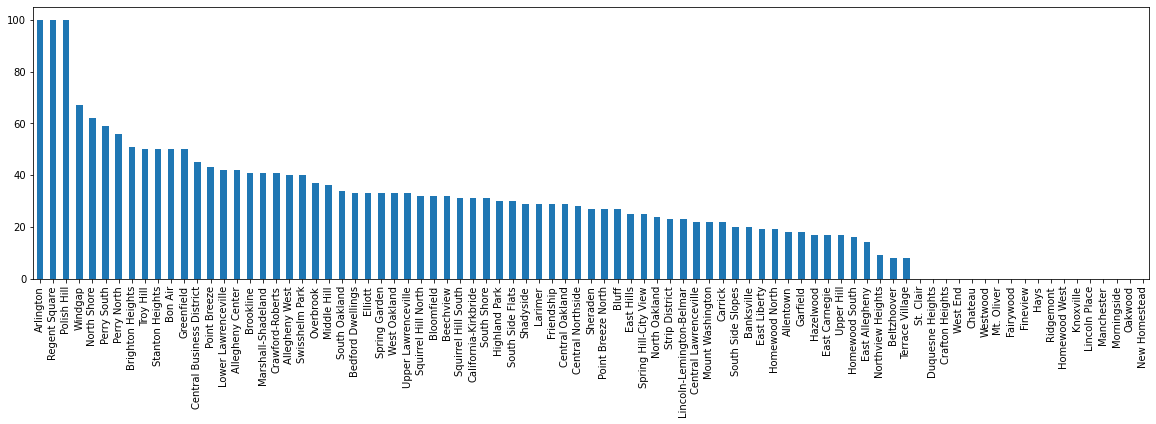

In [9]:
scores.plot.bar(figsize = (20,5))

<AxesSubplot:>

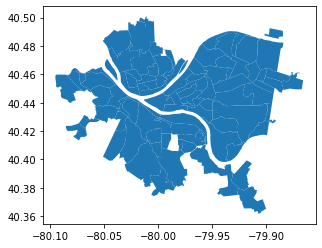

In [27]:
neighborhoods_map = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods_map.plot()

In [20]:
df_asbestos = pd.DataFrame(neighborhood_contains_asbestos["neighborhood"].value_counts())
df_asbestos = df_asbestos.reset_index()

,index,neighborhood
0,Central Business District,186
1,West Oakland,66
2,Squirrel Hill North,35
3,Allegheny Center,32
4,Bloomfield,31
5,North Oakland,31
6,Bluff,31
7,Perry South,29
8,Central Northside,28
9,Brighton Heights,25


In [25]:
df_asbestos.columns = ["neighborhood","asbestos"]

<AxesSubplot:>

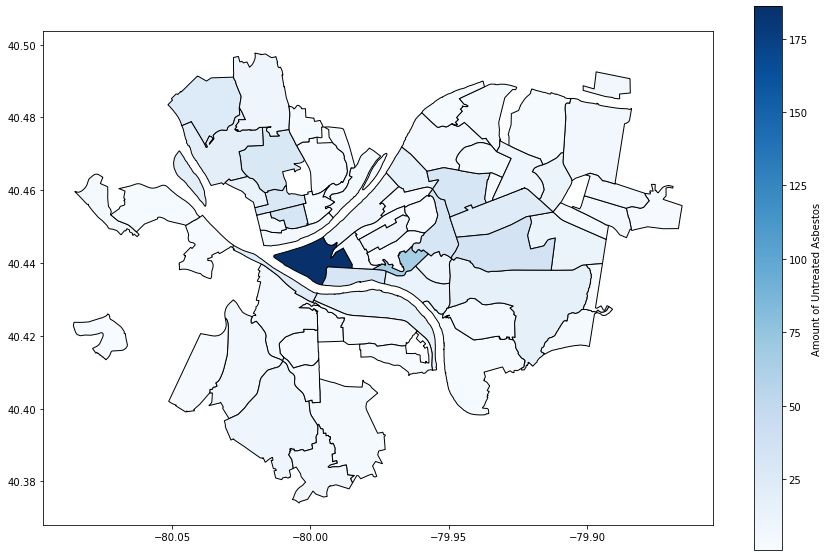

In [33]:
asbestos_map = neighborhoods_map.merge(df_asbestos, how = 'left', left_on = 'hood', right_on = 'neighborhood')
asbestos_map.plot(column = 'asbestos', figsize = (15,10), cmap = 'Blues',edgecolor = 'black', legend = True, legend_kwds={'label': "Amount of Untreated Asbestos"})

In [36]:
df_scores = pd.DataFrame(scores)
df_scores = df_scores.reset_index()

In [40]:
df_scores.columns = ["neighborhood","score"]

<AxesSubplot:>

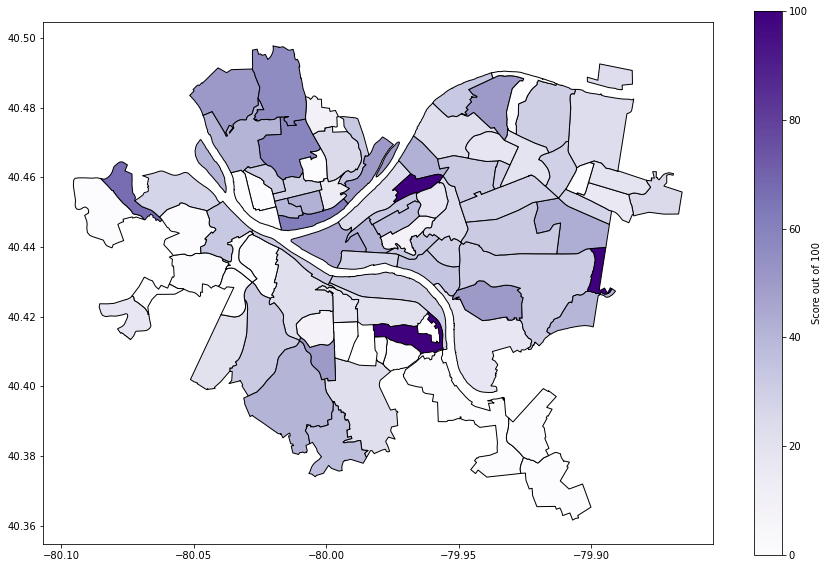

In [41]:
scores_map = neighborhoods_map.merge(df_scores, how = 'left', left_on = 'hood', right_on = 'neighborhood')
scores_map.plot(column = 'score', figsize = (15,10), cmap = 'Purples',edgecolor = 'black', legend = True, legend_kwds={'label': "Score out of 100"})